In [1]:
#导入第三方包
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats.mstats as mst

import matplotlib as mpl


plt.style.use('ggplot')

#设定目录及读取数据文件
dir = './data/'
train = pd.read_table(dir + 'train_20171215.txt',engine='python')
test_A = pd.read_table(dir + 'test_A_20171225.txt',engine='python')
sample_A = pd.read_table(dir + 'sample_A_20171225.txt',engine='python',header=None)
sample_A.columns = ['date','day_of_week']
train

,date,day_of_week,brand,cnt
0,1,3,1,20
1,1,3,5,48
2,2,4,1,16
3,2,4,3,20
4,3,5,1,1411
5,3,5,2,811
6,3,5,3,1005
7,3,5,4,773
8,3,5,5,1565
9,4,6,1,1176


In [2]:
#合并一日期下各品牌效率
train1 = train.groupby(['date','day_of_week'],as_index=False).cnt.sum()
train1['day_of_week']=train1['day_of_week'].astype('category')
from datetime import datetime
def datelist(beginDate, endDate):
    # beginDate, endDate是形如‘20160601’的字符串或datetime格式
    date_l=[datetime.strftime(x,'%Y%m%d') for x in list(pd.date_range(start=beginDate, end=endDate))]
    return date_l
train1['time']=datelist('20080101','20101028')
train1.tail(10)


,date,day_of_week,cnt,time
1022,1023,6,506,20101019
1023,1024,1,3439,20101020
1024,1025,2,3208,20101021
1025,1026,3,2277,20101022
1026,1027,4,2144,20101023
1027,1028,5,2519,20101024
1028,1029,6,195,20101025
1029,1030,2,4003,20101026
1030,1031,3,2513,20101027
1031,1032,4,1306,20101028


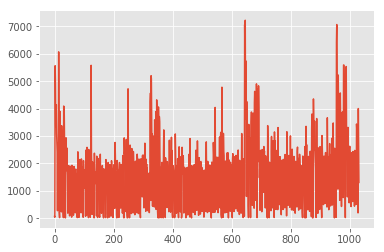

,date,cnt
count,1032.000000,1032.000000
mean,516.500000,1760.124031
std,298.057042,1153.164214
min,1.000000,12.000000
25%,258.750000,1178.750000
50%,516.500000,1774.000000
75%,774.250000,2277.750000
max,1032.000000,7226.000000


In [3]:
#观察上牌数量曲线
plt.plot(range(len(train1)),train1['cnt'])
plt.show()
train1.describe()

In [4]:
#winsorize缩尾上下1%，去除极端值影响
#train1['cnt']=mst.winsorize(train1['cnt'],limits=0.01)
#train1.describe()

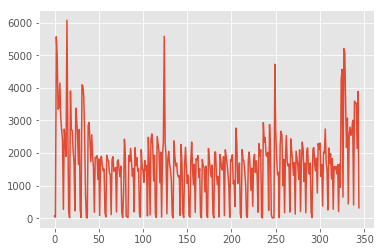

             date          cnt
count  345.000000   345.000000
mean   173.000000  1614.498551
std     99.737155  1094.146556
min      1.000000    13.000000
25%     87.000000  1031.000000
50%    173.000000  1682.000000
75%    259.000000  2104.000000
max    345.000000  6072.000000


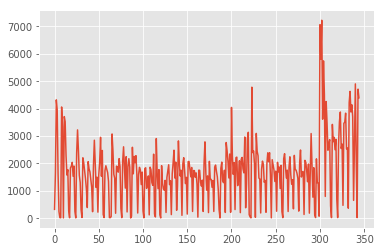

             date          cnt
count  345.000000   345.000000
mean   517.000000  1709.371014
std     99.737155  1179.642760
min    345.000000    12.000000
25%    431.000000  1100.000000
50%    517.000000  1722.000000
75%    603.000000  2176.000000
max    689.000000  7226.000000


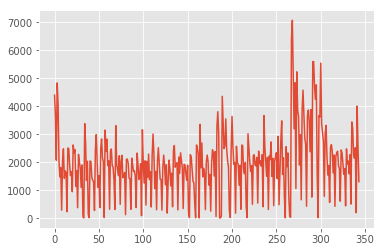

              date          cnt
count   344.000000   344.000000
mean    860.500000  1960.558140
std      99.448479  1167.431974
min     689.000000    12.000000
25%     774.750000  1386.250000
50%     860.500000  1949.500000
75%     946.250000  2461.500000
max    1032.000000  7069.000000


In [5]:

#根据数据描述，将数据按年分为3组
year1=train1.loc[:344]
year2=train1.loc[344:688]
year3=train1.loc[688:1032]

names = locals()
for i in range(1,4):
    plt.plot(range(len(names['year%s' % i])),names['year%s' % i]['cnt'])
    plt.show()
    print(names['year%s' % i].describe())

In [6]:
year1.to_csv(dir + 'year1.csv',index=False)
year2.to_csv(dir + 'year2.csv',index=False)
year3.to_csv(dir + 'year3.csv',index=False)

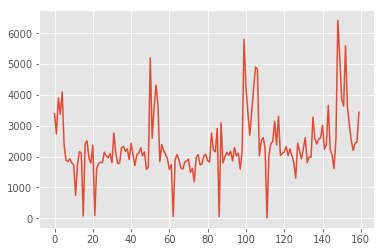

              date          cnt
count   160.000000   160.000000
mean    519.568750  2364.100000
std     296.984565   989.181863
min       6.000000    13.000000
25%     266.500000  1862.750000
50%     523.000000  2138.500000
75%     771.500000  2558.500000
max    1024.000000  6421.000000


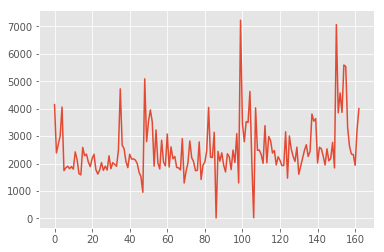

              date          cnt
count   163.000000   163.000000
mean    531.006135  2495.822086
std     294.538737   999.493291
min       7.000000    15.000000
25%     284.000000  1910.000000
50%     540.000000  2246.000000
75%     780.000000  2790.500000
max    1030.000000  7226.000000


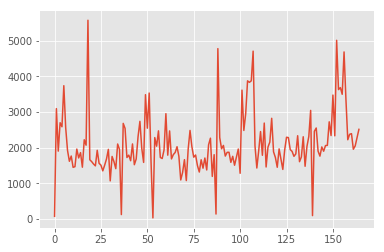

              date          cnt
count   165.000000   165.000000
mean    528.363636  2094.787879
std     297.350948   854.445433
min       1.000000    23.000000
25%     276.000000  1658.000000
50%     535.000000  1933.000000
75%     784.000000  2339.000000
max    1031.000000  5581.000000


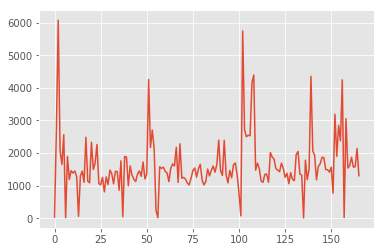

              date          cnt
count   166.000000   166.000000
mean    523.042169  1625.506024
std     302.547153   878.351940
min       2.000000    12.000000
25%     266.500000  1212.000000
50%     526.000000  1469.500000
75%     783.500000  1849.000000
max    1032.000000  6072.000000


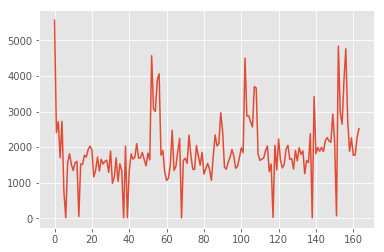

              date          cnt
count   164.000000   164.000000
mean    516.310976  1889.317073
std     300.059924   874.393264
min       3.000000    12.000000
25%     258.250000  1498.500000
50%     515.000000  1753.000000
75%     775.500000  2097.500000
max    1028.000000  5565.000000


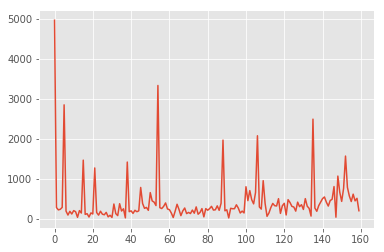

             date          cnt
count   160.00000   160.000000
mean    518.39375   412.087500
std     298.69153   597.645794
min       4.00000    15.000000
25%     265.50000   166.000000
50%     516.00000   252.000000
75%     776.50000   409.000000
max    1029.00000  4966.000000


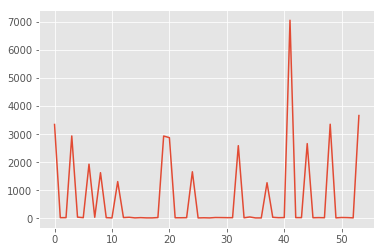

             date          cnt
count   54.000000    54.000000
mean   402.222222   742.907407
std    284.082679  1425.558550
min      5.000000    13.000000
25%    157.250000    19.250000
50%    365.500000    24.000000
75%    630.750000   962.750000
max    987.000000  7063.000000


In [7]:
#根据数据描述，将数据按年分为3组

names = locals()
for i in range(1,8):
    names['week%s' % i] = train1[train1['day_of_week']==i]
    plt.plot(range(len(names['week%s' % i])),names['week%s' % i]['cnt'])
    plt.show()
    print(names['week%s' % i].describe())

In [8]:
week1.to_csv(dir + 'week1.csv',index=False)
week2.to_csv(dir + 'week2.csv',index=False)
week3.to_csv(dir + 'week3.csv',index=False)
week4.to_csv(dir + 'week4.csv',index=False)
week5.to_csv(dir + 'week5.csv',index=False)
week6.to_csv(dir + 'week6.csv',index=False)
week7.to_csv(dir + 'week7.csv',index=False)